In [9]:
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import linear_model

In [5]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


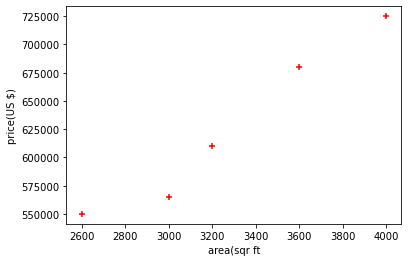

In [10]:
plt.xlabel('area(sqr ft')
plt.ylabel('price(US $)')
plt.scatter(df.area, df.price, color='red', marker='+')

In [11]:
reg = linear_model.LinearRegression()  # reg is object for linear regression
reg.fit(df[['area']], df.price)        # fitting the data means we are training the model 

LinearRegression()

In [16]:
reg.predict([[3300]])

array([628715.75342466])

In [17]:
#slope (m)
reg.coef_

array([135.78767123])

In [18]:
#intercept (c)
reg.intercept_

180616.43835616432

In [21]:
# y = m*x + c
y = 135.78767123 * 3300 + 180616.43835616432
y

628715.7534151643

In [22]:
reg.predict([[5000]])

array([859554.79452055])

In [26]:
# Now prdeict the price of multiple area given in a CSV File
d = pd.read_csv("areas.csv")
d.head(4)

,area
0,1000
1,1500
2,2300
3,3540


In [28]:
p = reg.predict(d)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [29]:
# we are creating a new column in 'd' dataframe which is the price predicted for respected area
d['prices'] = p

In [30]:
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [33]:
# Export the 'd' dataframe to a CSV File
d.to_csv('prediction.csv')

In [34]:
d.to_csv('prediction.csv', index=False)

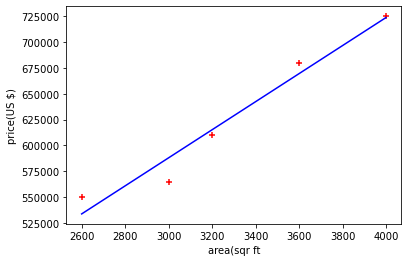

In [38]:
plt.xlabel('area(sqr ft')
plt.ylabel('price(US $)')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]),color='blue')